In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('placement.csv')

In [4]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


C:\Users\TUSHAR GANDHI\AppData\Local\Temp\ipykernel_9484\3870382193.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'],hist=False)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\TUSHAR GANDHI\AppData\Local\Temp\ipykernel_9484\3870382193.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level f

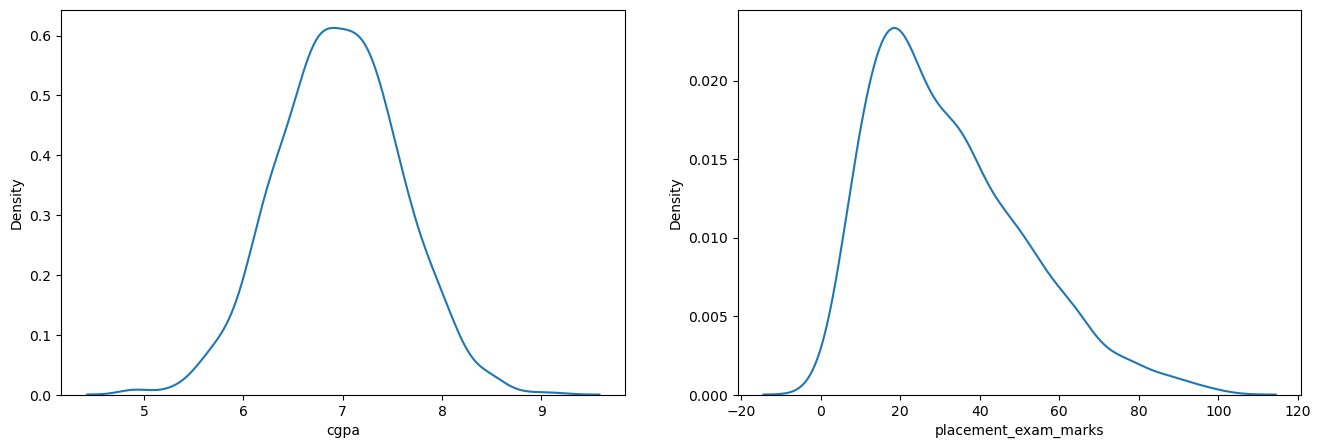

In [7]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'],hist=False)

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'],hist=False)

plt.show()

In [8]:
print("Mean value of cgpa:",df['cgpa'].mean())
print("Median value of cgpa:",df['cgpa'].median())
print("Standard deviation of cgpa:",df['cgpa'].std())
print("Max value of cgpa:",df['cgpa'].max())
print("Min value of cgpa:",df['cgpa'].min())

Mean value of cgpa: 6.96124
Median value of cgpa: 6.96
Standard deviation of cgpa: 0.6158978751323894
Max value of cgpa: 9.12
Min value of cgpa: 4.89


In [9]:
print("Higest allowed",df['cgpa'].mean() + 3*df['cgpa'].std())
print("lowest allowed",df['cgpa'].mean() - 3*df['cgpa'].std())

Higest allowed 8.808933625397168
lowest allowed 5.113546374602832


In [12]:
df[(df['cgpa'] > 8.80) | (df['cgpa'] < 5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


## Trimming

In [18]:
new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]

In [19]:
new_df.shape

(995, 3)

## approch 2

In [20]:
df['zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [21]:
df[df['zscore'] > 3]

,cgpa,placement_exam_marks,placed,zscore
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062


In [23]:
df[df['zscore'] < -3]

,cgpa,placement_exam_marks,placed,zscore
485,4.92,44.0,1,-3.314251
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


# Capping

In [ ]:
# np.where(condition,true,false)

In [24]:
upper_limit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_limit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [25]:
df['cgpa'] = np.where(
    df['cgpa'] > upper_limit,
    upper_limit,
    np.where(
        df['cgpa'] < lower_limit,
        lower_limit,
        df['cgpa']
    )
)

In [28]:
df['cgpa'].describe()

count    1000.000000
mean        6.961499
std         0.612688
min         5.113546
25%         6.550000
50%         6.960000
75%         7.370000
max         8.808934
Name: cgpa, dtype: float64